In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import parser

In [2]:
pd.set_option('display.max_rows', 100)

In [3]:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

<br>

## Open data

In [4]:
source = pd.read_csv("./tables/table.csv",low_memory=False)

## Select clean data

In [5]:
data = source[source.missing == 0].reset_index(drop=True)
data['date'] = pd.to_datetime(data['date'])
data['year'] = data.date.dt.year
data['month'] = ""
data['month'].loc[(data.date.dt.month<10)] = "0" + data.date.dt.month[data.date.dt.month<10].apply(str).values
data['month'].loc[(data.date.dt.month>9)] = data.date.dt.month[data.date.dt.month>9].apply(str).values
data['year-month'] = data.date.dt.year.apply(str)+"-"+data['month']

dic_exp = {}
temp = pd.read_csv("tables/table_bio.csv")
for leg in set(temp.legDes_n):
    temp_leg = temp[temp.legDes_n<=leg].groupby(["cadId"])["legDes_n"].count().reset_index()
    dic_exp[leg] = dict(zip(temp_leg.cadId, temp_leg.legDes_n))
    
data["experience_leg"] = data.apply(lambda x: dic_exp[x.legDes_n][x.cadId], axis=1)
data['types'] = data.type
data = pd.get_dummies(data, columns=['types'])
data.to_csv("./tables/table_clean.csv", index = False)
#data[data.missing == 0].reset_index(drop=True).to_csv("./tables/table_all.csv", index = False)

/home/boturon/miniconda3/envs/ml/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
data.head(5)

source_leg  cadId legDes  type       date     id subtype  \
0           2    147     II  actP 1982-04-02  80353     ITG   
1           2    147     II   ini 1981-03-12  30469       J   
2           2    147     II   ini 1981-03-10  30461       J   
3           2    147     II   ini 1980-12-11  30367       J   
4           2    147     II   ini 1980-12-11  30366       J   

             cadNomeCompleto cadSexo cadDtNascimento  ... legDes_n missing  \
0  ANTÓNIO DE ALMEIDA SANTOS       M      1926-02-15  ...        2       0   
1  ANTÓNIO DE ALMEIDA SANTOS       M      1926-02-15  ...        2       0   
2  ANTÓNIO DE ALMEIDA SANTOS       M      1926-02-15  ...        2       0   
3  ANTÓNIO DE ALMEIDA SANTOS       M      1926-02-15  ...        2       0   
4  ANTÓNIO DE ALMEIDA SANTOS       M      1926-02-15  ...        2       0   

   year  month  year-month  experience_leg types_actP types_ini  types_intev  \
0  1982     04     1982-04               1          1         0            0   
1  1981     03     1981-03               1          0         1            0   
2  1981     03     1981-03               1          0         1            0   
3  1980     12     1980-12               1          0         1            0   
4  1980     12     1980-12               1          0         1            0   

   types_req  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 23 columns]

In [ ]:
data[]

### 20190208 Update

A que mais nos faz falta é a que tem as atividades totais e as parciais per capita, para homens e mulheres. Duas colunas lado a lado para os dois géneros.

Por legislatura.

In [56]:
data["year-month_cadId"] = data["year-month"]+"_"+data.cadId.apply(str)
data["year-month_cadSexo"] = data["year-month"]+"_"+data.cadSexo

In [57]:
data.groupby(by=['year-month', 'cadId']).sum()[[i for i in data.columns if i[:6]=="types_"]].to_csv("./tables/table_cadIDs_types_sum.csv")
data.groupby(by=['year-month', 'cadId']).sum().groupby('cadId').cumsum()[[i for i in data.columns if i[:6]=="types_"]].to_csv("./tables/table_cadIDs_types_cumsum.csv")

data.groupby(by=['year-month', 'cadId']).sum().groupby('cadId').cumsum()[[i for i in data.columns if i[:6]=="types_"]].head(10)#.query('cadId == 142')

types_actP  types_ini  types_intev  types_req
year-month cadId                                               
1980-11    142           0.0        9.0          0.0        0.0
           147           0.0       11.0          0.0        0.0
           160           0.0       21.0          0.0        0.0
           164           0.0        2.0          0.0        0.0
           196           0.0        8.0          0.0        0.0
           198           0.0       17.0          0.0        0.0
           210           0.0       34.0          0.0        0.0
           213           0.0        9.0          0.0        0.0
           217           0.0       51.0          0.0        0.0
           219           0.0       51.0          0.0        0.0

In [58]:
data.groupby(by=['year-month', 'cadSexo']).sum()[[i for i in data.columns if i[:6]=="types_"]].to_csv("./tables/table_genders_types_sum.csv")
data.groupby(by=['year-month', 'cadSexo']).sum().groupby('cadSexo').cumsum()[[i for i in data.columns if i[:6]=="types_"]].to_csv("./tables/table_genders_types_cumsum.csv")

data.groupby(by=['year-month', 'cadSexo']).sum().groupby('cadSexo').cumsum()[[i for i in data.columns if i[:6]=="types_"]].tail(10)#.query('cadId == 142')

types_actP  types_ini  types_intev  types_req
year-month cadSexo                                               
2018-07    F            8624.0    27437.0      21501.0    22138.0
           M           15002.0    78791.0      80322.0    78940.0
2018-08    F            8681.0    27437.0      21501.0    22138.0
           M           15064.0    78791.0      80322.0    78940.0
2018-09    F            8705.0    27437.0      21501.0    22138.0
           M           15096.0    78791.0      80322.0    78940.0
2018-10    F            8749.0    27437.0      21501.0    22138.0
           M           15158.0    78791.0      80322.0    78940.0
2018-12    F            8820.0    27437.0      21501.0    22138.0
           M           15244.0    78791.0      80322.0    78940.0

In [59]:
data["year-month_cadId"] = data["year-month"]+"_"+data.cadId.apply(str)

In [60]:
info_cols = ['source_leg', 'cadId', 'legDes', 'id', 
       'cadNomeCompleto', 'cadSexo', 'cadDtNascimento', 'cadProfissao',
       'gpSigla', 'ceDes', 'legDes_n', 'year', 'month',
       'year-month', 'experience_leg', 'year-month_cadId', "year-month_cadSexo"]

In [61]:
sum_df = data.groupby("year-month_cadId").sum()[[i for i in data.columns if i[:6]=="types_"]]
sum_df.columns = sum_df.columns+"_sum"; sum_df = sum_df.reset_index()
cumsum_df = data.groupby("year-month_cadId").sum().cumsum()[[i for i in data.columns if i[:6]=="types_"]]
cumsum_df.columns = cumsum_df.columns+"_cumsum"; cumsum_df = cumsum_df.reset_index()

data_monthly = data.drop_duplicates("year-month_cadId", keep="first")[info_cols].merge(sum_df,
                                                                        left_on='year-month_cadId', right_on='year-month_cadId')
data_monthly = data_monthly.merge(cumsum_df, left_on='year-month_cadId', right_on='year-month_cadId')

In [62]:
#data_monthly.to_csv
data_monthly = data_monthly.sort_values("year-month_cadId").reset_index(drop=True)
data_monthly.to_csv("./tables/table_monthly.csv", index = False)

In [65]:
data_monthly.head(5)

source_leg  cadId legDes     id  \
0           2   1205     II  30958   
1           2   1260     II  30928   
2           2   1349     II  30938   
3           2   1353     II  30304   
4           2    142     II  30937   

                                cadNomeCompleto cadSexo cadDtNascimento  \
0  ANTÓNIO MANUEL DE CARVALHO FERREIRA VITORINO       M      1957-01-12   
1              FERNANDO MANUEL DOS SANTOS GOMES       M      1946-04-13   
2         ANTÓNIO FERNANDO MARQUES RIBEIRO REIS       M      1948-05-09   
3       JOSÉ ERNESTO ILDEFONSO LEÃO D' OLIVEIRA       M      1952-09-07   
4               ALBERTO ARONS BRAGA DE CARVALHO       M      1949-09-20   

                          cadProfissao gpSigla     ceDes  ...  \
0  Advogado - Assistente Universitário    UEDS     PORTO  ...   
1                           Economista      PS     PORTO  ...   
2                     TÉCNICO SUPERIOR      PS  SANTARÉM  ...   
3                               MEDICO     PCP     ÉVORA  ...   
4                Docente Universitário      PS    LISBOA  ...   

   year-month_cadId  year-month_cadSexo types_actP_sum types_ini_sum  \
0      1980-11_1205           1980-11_M            0.0          16.0   
1      1980-11_1260           1980-11_M            0.0          10.0   
2      1980-11_1349           1980-11_M            0.0          14.0   
3      1980-11_1353           1980-11_M            0.0          33.0   
4       1980-11_142           1980-11_M            0.0           9.0   

   types_intev_sum types_req_sum types_actP_cumsum  types_ini_cumsum  \
0              0.0           0.0               0.0              16.0   
1              0.0           0.0               0.0              26.0   
2              0.0           0.0               0.0              40.0   
3              0.0           0.0               0.0              73.0   
4              0.0           0.0               0.0              82.0   

   types_intev_cumsum  types_req_cumsum  
0                 0.0               0.0  
1                 0.0               0.0  
2                 0.0               0.0  
3                 0.0               0.0  
4                 0.0               0.0  

[5 rows x 25 columns]

<br>

# Leg Data

In [69]:
data_monthly.loc[:,[i for i in data_monthly.columns if i[:-6]=="cumsum"]].groupby(["legDes", "cadSexo"]).count()

source_leg  cadId    id  cadNomeCompleto  cadDtNascimento  \
legDes cadSexo                                                              
II     F                58     58    58               58               58   
       M               362    362   362              362              362   
III    F                91     91    91               91               91   
       M               542    542   542              542              542   
IV     F                67     67    67               67               67   
       M               493    493   493              493              493   
IX     F              1083   1083  1083             1083             1083   
       M              3951   3951  3951             3951             3951   
V      F               512    512   512              512              512   
       M              3323   3323  3323             3323             3323   
VI     F               458    458   458              458              458   
       M              3961   3961  3961             3961             3961   
VII    F               765    765   765              765              765   
       M              5027   5027  5027             5027             5027   
VIII   F               759    759   759              759              759   
       M              3207   3207  3207             3207             3207   
X      F              1960   1960  1960             1960             1960   
       M              5678   5678  5678             5678             5678   
XI     F               984    984   984              984              984   
       M              2306   2306  2306             2306             2306   
XII    F              2625   2625  2625             2625             2625   
       M              6056   6056  6056             6056             6056   
XIII   F              2347   2347  2347             2347             2347   
       M              4260   4260  4260             4260             4260   

                cadProfissao  gpSigla  ceDes  legDes_n  year  ...  \
legDes cadSexo                                                ...   
II     F                  58       58     58        58    58  ...   
       M                 362      362    362       362   362  ...   
III    F                  91       91     91        91    91  ...   
       M                 542      542    542       542   542  ...   
IV     F                  67       67     67        67    67  ...   
       M                 493      493    493       493   493  ...   
IX     F                1083     1083   1083      1083  1083  ...   
       M                3951     3951   3951      3951  3951  ...   
V      F                 512      512    512       512   512  ...   
       M                3323     3323   3323      3323  3323  ...   
VI     F                 458      458    458       458   458  ...   
       M                3961     3961   3961      3961  3961  ...   
VII    F                 765      765    765       765   765  ...   
       M                5027     5027   5027      5027  5027  ...   
VIII   F                 759      759    759       759   759  ...   
       M                3207     3207   3207      3207  3207  ...   
X      F                1960     1960   1960      1960  1960  ...   
       M                5678     5678   5678      5678  5678  ...   
XI     F                 984      984    984       984   984  ...   
       M                2306     2306   2306      2306  2306  ...   
XII    F                2625     2625   2625      2625  2625  ...   
       M                6056     6056   6056      6056  6056  ...   
XIII   F                2347     2347   2347      2347  2347  ...   
       M                4260     4260   4260      4260  4260  ...   

                year-month_cadId  year-month_cadSexo  types_actP_sum  \
legDes cadSexo                                                         
II     F                      58                  58              58   
  

<br>

# Summary Table

In [20]:
summary_df = data.groupby(['source_leg', "cadSexo"]).sum()[[i for i in data.columns if i[:6]=="types_"]]
summary_df["types_total"] = summary_df.sum(axis=1)
summary_df = pd.concat((summary_df.reset_index(),
                 summary_df.reset_index().groupby('source_leg').aggregate('sum').reset_index()), sort=True).\
                      sort_values(['source_leg','cadSexo']).\
                      fillna('Total').\
                      set_index(['source_leg','cadSexo'])

In [21]:
summary_bio_df = pd.read_csv("tables/table_bio.csv").groupby(['source_leg', 'cadSexo']).count().iloc[:,:5] 
summary_bio_df = pd.concat((summary_bio_df.reset_index(),
                 summary_bio_df.reset_index().groupby('source_leg').aggregate('sum').reset_index()), sort=True).\
                      sort_values(['source_leg','cadSexo']).\
                      fillna('Total').\
                      set_index(['source_leg','cadSexo'])

In [22]:
summary_df = summary_df/summary_bio_df.values

In [23]:
summary_df.round(2)

types_actP  types_ini  types_intev  types_req  types_total
source_leg cadSexo                                                            
2          F              0.03       7.41         0.00       0.00         7.44
           M              0.03       2.71         0.00       0.00         2.74
           Total          0.03       3.11         0.00       0.00         3.15
3          F              0.14       9.72         1.47       0.00        11.33
           M              0.03       2.80         1.43       0.00         4.27
           Total          0.04       3.33         1.44       0.00         4.81
4          F              0.38       9.52         0.00       0.00         9.90
           M              0.02       2.60         0.00       0.00         2.62
           Total          0.04       2.95         0.00       0.00         2.98
5          F              3.21      23.74        24.19       0.00        51.14
           M              2.29      11.56        27.36       0.00        41.21
           Total          2.38      12.77        27.04       0.00        42.19
6          F              0.39      10.58        26.31       0.03        37.31
           M              0.22      10.66        29.46       0.03        40.37
           Total          0.24      10.65        29.13       0.03        40.05
7          F              0.08       9.72        39.79      18.53        68.11
           M              0.03      11.85        37.39      13.77        63.04
           Total          0.04      11.54        37.74      14.47        63.78
8          F              0.20       9.35        25.75      24.40        59.70
           M              0.21      11.76        24.19      16.39        52.55
           Total          0.21      11.32        24.47      17.85        53.85
9          F              4.82      15.09        31.25      33.90        85.06
           M              4.40      15.31        30.49      40.39        90.60
           Total          4.49      15.27        30.64      39.11        89.50
10         F              3.79      24.23        39.34      40.53       107.90
           M              4.50      35.25        42.43      47.29       129.48
           Total          4.33      32.53        41.67      45.62       124.14
11         F              5.46      54.08        21.72      54.82       136.08
           M              5.07      68.26        22.52      64.60       160.45
           Total          5.18      64.11        22.28      61.74       153.32
12         F             16.04      81.23        52.78      72.53       222.58
           M             14.95      78.93        54.48     112.56       260.93
           Total         15.29      79.65        53.95     100.03       248.92
13         F             54.55      81.40        31.74      23.82       191.51
           M             40.76      94.80        35.29      56.70       227.55
           Total         45.85      89.86        33.98      44.56       214.24

In [24]:
summary_df.to_csv("tables/table_summary_means.csv")

## Visualizations

### Requested

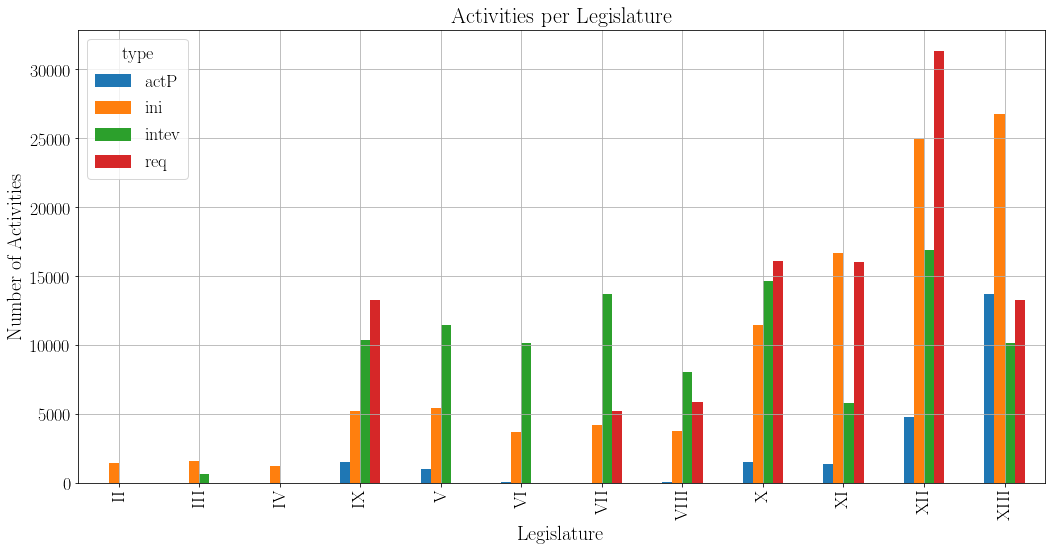

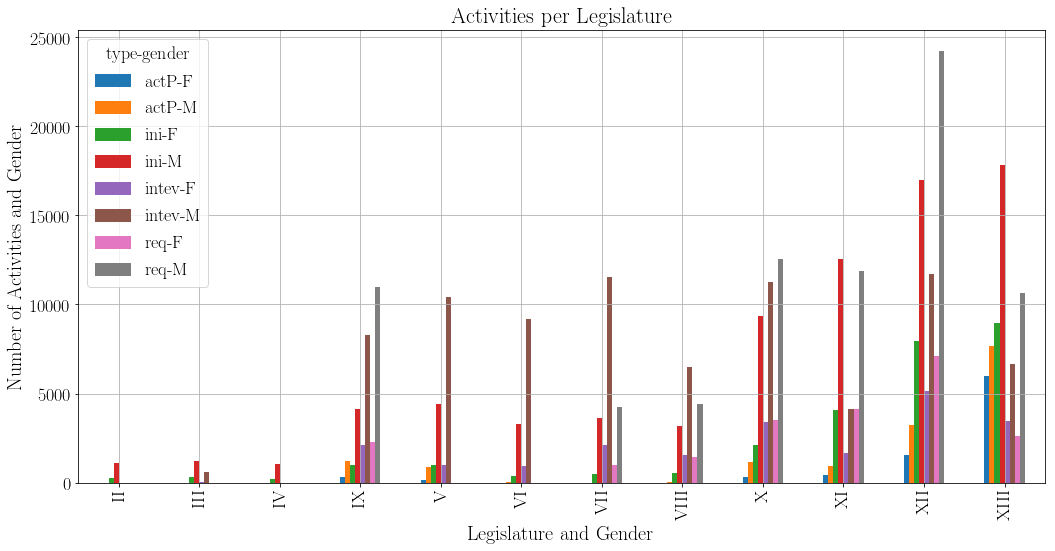

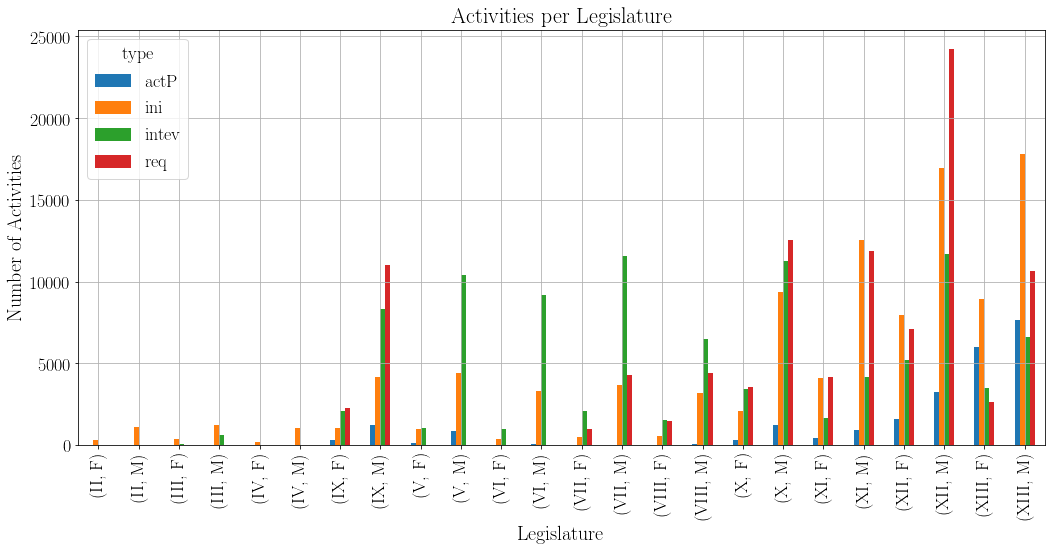

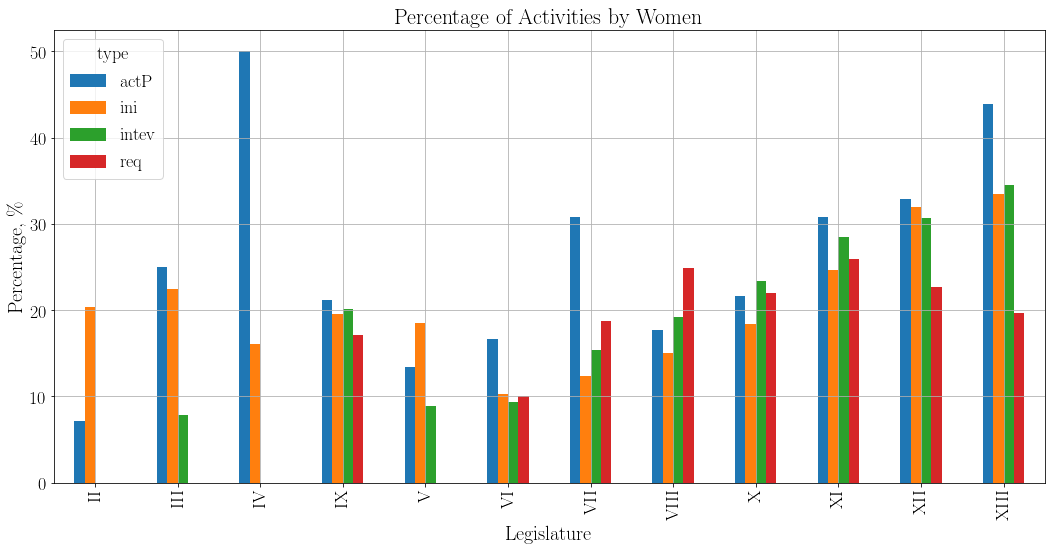

In [43]:
f, ax = plt.subplots(figsize=(15, 8))
data.groupby(["legDes",'type'])["type"].count().unstack().plot(kind='bar', stacked=False, ax=ax)
ax.set_title("Activities per Legislature", fontsize=22)
ax.set_ylabel("Number of Activities", fontsize=20)
ax.set_xlabel("Legislature", fontsize=20)
ax.grid()
plt.tight_layout(); plt.show()
print("\n"*2)
####################################################################################################

f, ax = plt.subplots(figsize=(15, 8))
data["type-gender"] = data['type'].apply(str)+"-"+data['cadSexo'].apply(str)
data.groupby(["legDes","type-gender"])["cadSexo"].count().unstack().plot(kind='bar', stacked=False, ax=ax)
ax.set_title("Activities per Legislature", fontsize=22)
ax.set_ylabel("Number of Activities and Gender", fontsize=20)
ax.set_xlabel("Legislature and Gender", fontsize=20)
ax.grid()
plt.tight_layout(); plt.show()


print("\n"*2)
####################################################################################################


f, ax = plt.subplots(figsize=(15, 8))
data.groupby(["legDes","cadSexo",'type'])["type"].count().unstack().plot(kind='bar', stacked=False, ax=ax)
ax.set_title("Activities per Legislature", fontsize=22)
ax.set_ylabel("Number of Activities", fontsize=20)
ax.set_xlabel("Legislature", fontsize=20)
ax.grid()
plt.tight_layout(); plt.show()

print("\n"*2)
####################################################################################################


f, ax = plt.subplots(figsize=(15, 8))
(data[data.cadSexo == "F"].groupby(["legDes",'type']).type.count().unstack()/data.groupby(["legDes",'type']).type.count().unstack()*100).plot(kind='bar', stacked=False, ax=ax)
ax.set_title("Percentage of Activities by Women", fontsize=22)
ax.set_ylabel(r"Percentage, $\%$", fontsize=20)
ax.set_xlabel("Legislature", fontsize=20)
ax.grid()
plt.tight_layout(); plt.show()
print("\n"*2)
####################################################################################################

<br>

# Missing Values

In [27]:
table_missing = source.groupby(["legDes", "type", "cadSexo", "missing"]).id.count().rename("% per leg")
pd.DataFrame(table_missing / table_missing.groupby(level=0).sum()*100)

% per leg
legDes type  cadSexo missing           
II     actP  F       0         0.018954
                     2         0.018954
             M       0         0.246399
                     1         0.037908
                     2         0.265353
       ini   F       0         5.477635
                     1         0.398029
                     2         6.690675
             M       0        21.379833
                     1         4.700531
                     2        58.718726
                     3         2.028052
       intev M       2         0.018954
III    actP  F       0         0.085499
                     2         0.051300
             M       0         0.256498
                     2         0.307798
       ini   F       0         5.984952
                     2         4.668263
             M       0        20.673735
                     1         0.701094
                     2        41.911765
       intev F       0         0.906293
                     2         0.512996
             M       0        10.584815
                     1         0.564295
                     2        12.790698
IV     actP  F       0         0.219720
                     2         0.054930
             M       0         0.219720
                     1         0.027465
                     2         0.439440
       ini   F       0         5.492996
                     2         2.746498
             M       0        28.563581
                     1         0.576765
                     2        61.191980
                     3         0.466905
IX     actP  F       0         1.053249
                     1         0.009783
             M       0         3.906479
                     1         0.052173
       ini   F       0         3.296703
                     1         0.048913
             M       0        13.581374
                     1         0.130433
                     2         0.016304
       intev F       0         6.828187
                     1         0.035869
             M       0        27.038837
...                                 ...
XI     actP  M       0         1.719942
                     1         0.036869
       ini   F       0         7.576596
                     1         0.490359
             M       0        23.151937
                     1         0.717104
       intev F       0         3.043542
                     1         0.134572
             M       0         7.637429
                     1         0.259927
       req   F       0         7.679829
                     1         6.249309
                     2         0.403716
             M       0        21.913136
                     1        17.752461
                     2         0.442429
XII    actP  F       0         1.495420
                     1         0.060882
             M       0         3.057429
                     1         0.045662
       ini   F       0         7.573178
                     1         0.839984
             M       0        16.144253
                     1         0.140790
       intev F       0         4.920045
                     1         0.307265
             M       0        11.143349
                     1         0.125570
       req   F       0         6.761732
                     1         7.370554
                     2         0.640215
             M       0        23.022041
                     1        16.210843
                     2         0.140790
XIII   actP  F       0         6.216269
                     1         0.287972
             M       0         7.936853
                     2         0.001036
       ini   F       0         9.275200
                     1         1.563131
             M       0        18.462351
       intev F       0         3.616230
                     1         0.309726
             M       0         6.873012
                     1         0.002072
       req   F       0         2.713985
                     1        12.353813
                     2        